In [1]:
%matplotlib inline

import os
import numpy as np

import gym
import neat

import utils.PyPlotReporter
import utils.SubstrateNet as Substrate
from utils.EnvEvaluator import * 
from utils.SubstrateNet import grid_mapping_bounds, grid_mapping_center

Using TensorFlow backend.


In [7]:
class HyperNeatEnvEvaluator(HyperNeatEnvEvaluator):
    
    def make_substrate(self):
        sub = Substrate.Sequential(min_abs_weight=0)
        sub.input(Substrate.Input(grid_mapping_center((4,1), 0, scale=0.25)))
        sub.add(Substrate.Dense(grid_mapping_bounds((3,3), 0.5, range_x=(-0.5,0.5), range_y=(-0.5, 0.5))))
        sub.add(Substrate.Dense([(0,0,1)]))
        sub.compile()
        return sub

    def activate_net(self, sub, observation): 
        return (sub.activate(observation)[0] > 0.5)[0]

evaluator = HyperNeatEnvEvaluator("CartPole-v0", 200)

In [12]:
config_path = "./configs/hyperpole.cfg" 

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)


pop = neat.Population(config)
pop.add_reporter(utils.PyPlotReporter.PyPlotReporter())


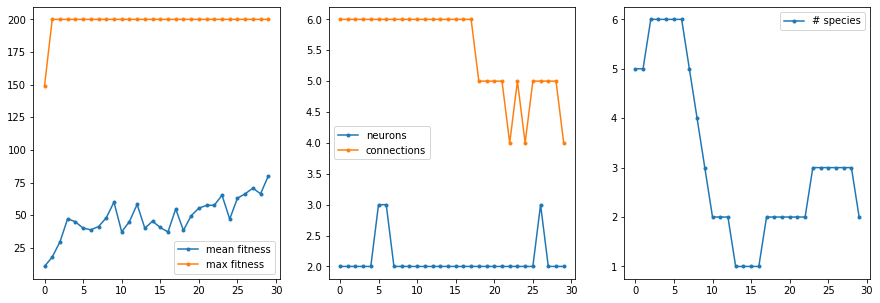

In [13]:
gnome = pop.run(evaluator.eval_all_genomes, 30)